In [1]:
import pandas as pd
from sacrebleu.metrics import BLEU
from typing import Generator, Tuple

In [2]:
SOURCES = "../../data/en-fr/raw/test.fr"
HYPOTHESES = "baseline/translations.p.txt"
REFERENCES = "../../data/en-fr/raw/test.en"

In [3]:
def shr_generator() -> Generator[Tuple[str, str, str], None, None]:
    with open(SOURCES, "r") as sources:
        with open(HYPOTHESES, "r") as hypotheses:
            with open(REFERENCES, "r") as references:
                for s, h, r in zip(sources, hypotheses, references):
                    yield s.strip(), h.strip(), r.strip()

shr = [x for x in shr_generator()]
df = pd.DataFrame(shr, columns=["source", "hypothesis", "reference"])
            

In [4]:
bleu = BLEU(effective_order=True)

def add_bleu(row):
    b_score = bleu.sentence_score(row["hypothesis"], [row["reference"]])
    return b_score.score

df["bleu"] = df.apply(lambda row: add_bleu(row), axis=1)
df.head()
    

,source,hypothesis,reference,bleu
0,Linda va être ici.,I'm going to be here for a here.,Linda will be here.,12.549311
1,Je crains que vous ne soyez descendu au mauvai...,I'm afraid that you don't be to be right now.,I'm afraid you got off at the wrong place.,8.913766
2,Je ferme la porte ?,Do I take the door?,Shall I close the door?,32.466792
3,Il abuse de son autorité.,He's trying to his mother of his mother.,He abuses his authority.,5.669791
4,Il est plus grand que tous les autres garçons.,He is more than all the others we're taller th...,He is taller than any other boy.,9.238430


In [5]:
df["source_len"] = df.source.apply(lambda x: len(str(x)))

<AxesSubplot:xlabel='source_len', ylabel='bleu'>

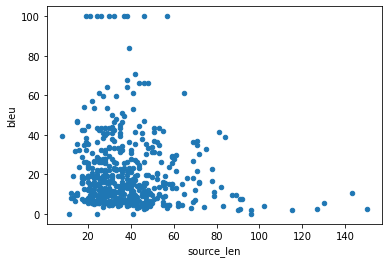

In [6]:
df.plot.scatter("source_len", "bleu")

<AxesSubplot:xlabel='source_len'>

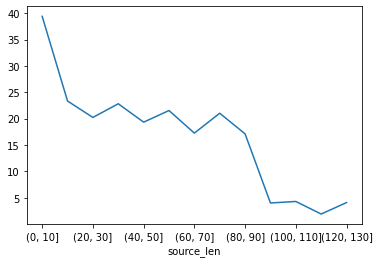

In [21]:
#from matplotlib import pyplot as plt

bins = list(range(0,150,10))
grouped = df.groupby(pd.cut(df["source_len"], bins=bins)).mean()
grouped["bleu"].plot()


In [ ]:
df[df["bleu"] > 80]

,source,hypothesis,reference,bleu,source_len
24,Vous êtes chanceuse d'avoir un emploi.,You're lucky to have a job.,You're lucky to have a job.,100.000000,38
86,Je sais que tu veux rentrer chez toi.,I know you want to go home.,I know you want to go home.,100.000000,37
89,Je pense que Tom est réveillé.,I think Tom is awake.,I think Tom is awake.,100.000000,30
211,Je sais que vous êtes amoureux de moi !,I know you're in love with me!,I know you're in love with me.,84.089642,39
214,Comment suis-je supposé manger ?,How am I supposed to eat?,How am I supposed to eat?,100.000000,32
298,As-tu des questions ?,Do you have any questions?,Do you have any questions?,100.000000,21
307,Quelle est l'idée ?,What's the idea?,What's the idea?,100.000000,19
391,Je n'ai aucune idée de ce que nous sommes supp...,I have no idea what we're supposed to do.,I have no idea what we're supposed to do.,100.000000,57
470,Qu'êtes-vous censé faire ?,What are you supposed to do?,What are you supposed to do?,100.000000,26
476,Tom pourrait faire cela.,Tom could do that.,Tom could do that.,100.000000,24
